# Penguin Species Classification

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import style
import matplotlib.pyplot as plt 
import seaborn as sns

style.use('seaborn')

%matplotlib inline

In [2]:
df = pd.read_csv('./data/penguins.csv')
df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [3]:
df[df.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [4]:
df = df.dropna()

In [5]:
df.columns

Index(['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass', 'Species'], dtype='object')

In [6]:
features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
target = ['Species']

In [7]:
def plot_distribution(dataset):
    try:
        print("Field name :",dataset.name)
    except Exception as e:
        pass
    min_value = dataset.min()
    max_value = dataset.max()
    mean_value = dataset.mean()
    median_value = dataset.median()
    mode_value = dataset.mode()[0]
    
    print(f"""
    Minimum Value : {min_value} 
    Maximum Value : {max_value}
    Median        : {median_value}
    Mode Value    : {mode_value}
    Mean Value    : {mean_value}
    """)
    
    fig, ax = plt.subplots(3,1,figsize=(12,12))
    
    ax[0].hist(dataset.values)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)


    ax[1].boxplot(dataset,vert=False)
    ax[1].set_xlabel('Value')
    
    sns.distplot(dataset,kde=True,hist=True)
    ax[2].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)
    
    fig.suptitle(dataset.name)

    plt.show()

Field name : CulmenLength

    Minimum Value : 32.1 
    Maximum Value : 59.6
    Median        : 44.45
    Mode Value    : 41.1
    Mean Value    : 43.921929824561424
    


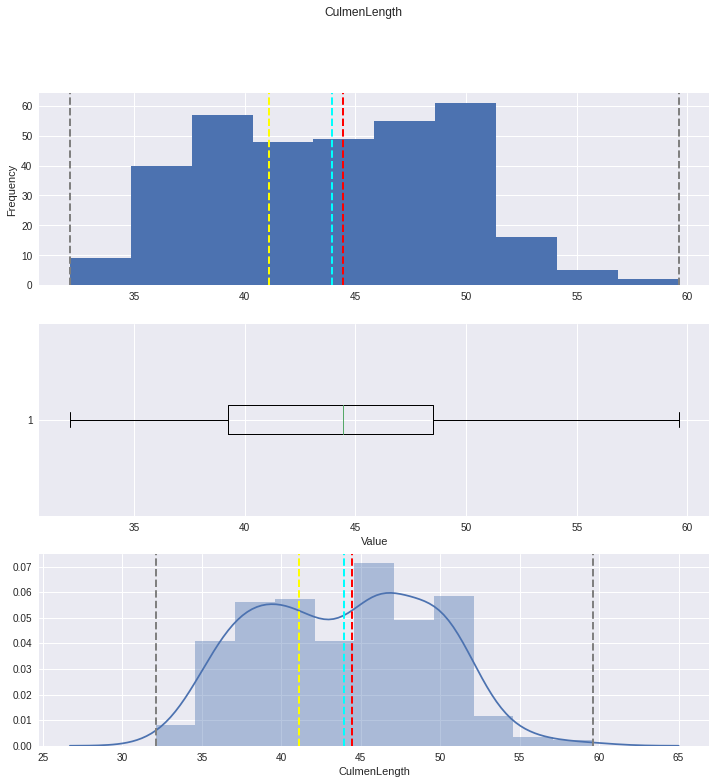

________________________________________________________________________________________________
Field name : CulmenDepth

    Minimum Value : 13.1 
    Maximum Value : 21.5
    Median        : 17.3
    Mode Value    : 17.0
    Mean Value    : 17.15116959064328
    


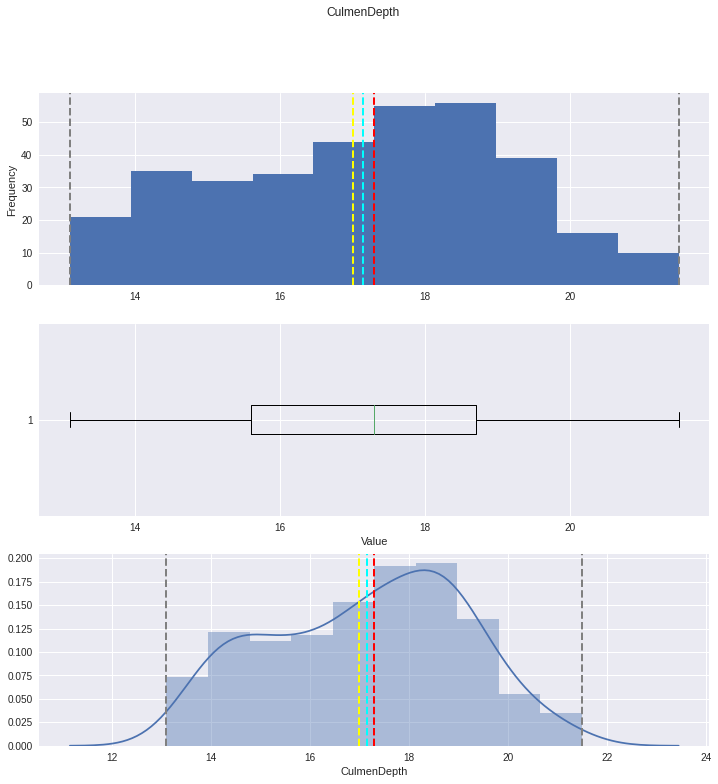

________________________________________________________________________________________________
Field name : FlipperLength

    Minimum Value : 172.0 
    Maximum Value : 231.0
    Median        : 197.0
    Mode Value    : 190.0
    Mean Value    : 200.91520467836258
    


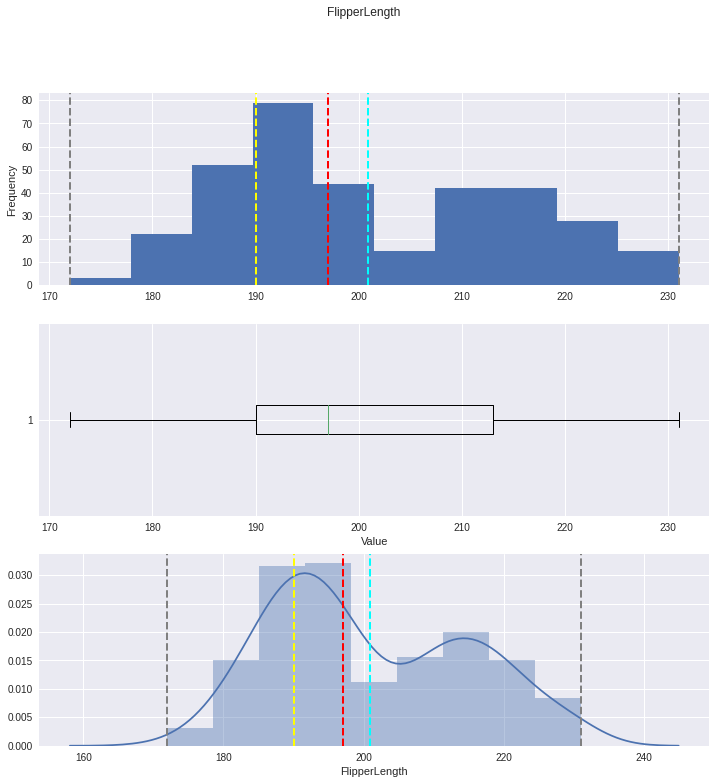

________________________________________________________________________________________________
Field name : BodyMass

    Minimum Value : 2700.0 
    Maximum Value : 6300.0
    Median        : 4050.0
    Mode Value    : 3800.0
    Mean Value    : 4201.754385964912
    


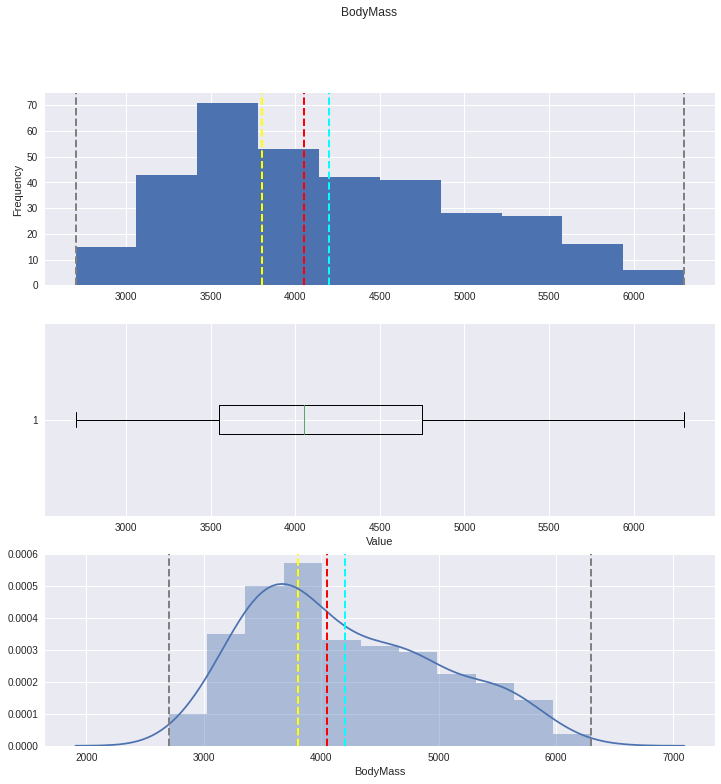

________________________________________________________________________________________________


In [8]:
for i in features:
    plot_distribution(df[i])
    print("________________________________________________________________________________________________")

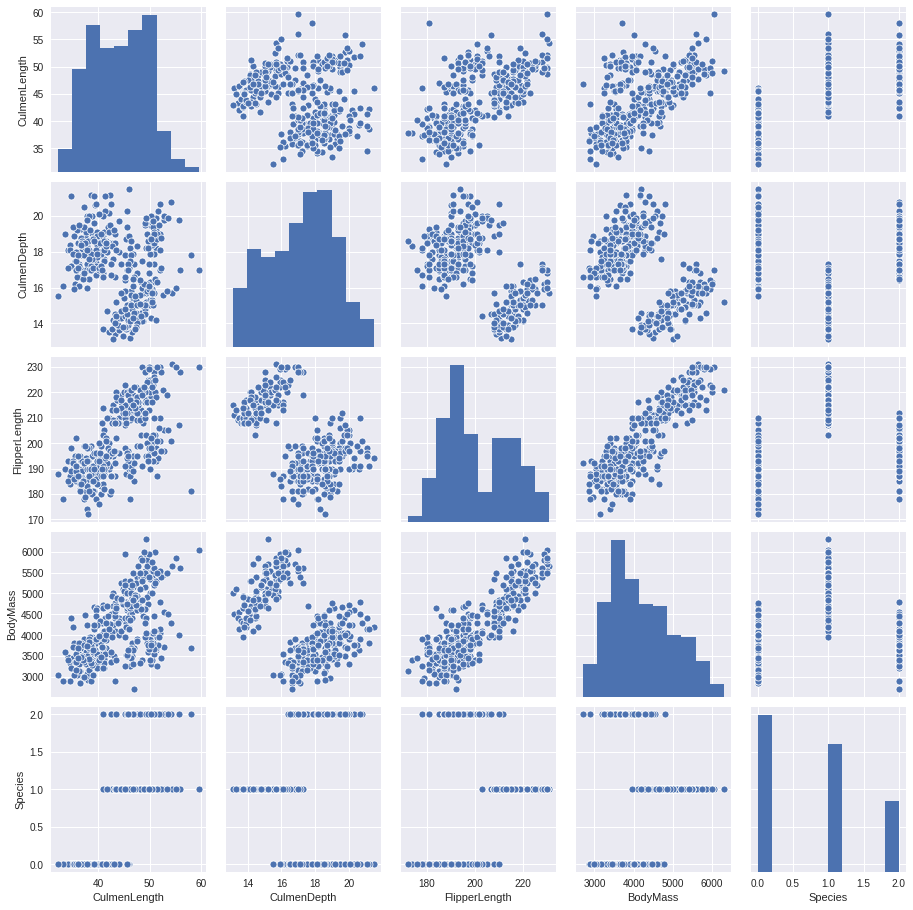

In [9]:
sns.pairplot(df)

In [21]:
X = df[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']]
y = df['Species']

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())
])

preprocessing = ColumnTransformer(transformers=[
    ('scaler',numerical_transformer,[0,1,2,3])
])

In [57]:
from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('logisitc regression',LogisticRegression(C=1/0.1,solver='lbfgs', multi_class='auto', max_iter=10000))
])

model = model_pipeline.fit(X_train,y_train)
print(model)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('logisitc regression',
                 LogisticRegression(C=10.0, max_iter=10000))])


Confusion Matrix:
 [[36  0  0]
 [ 0 20  0]
 [ 0  0 13]] 

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        13

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


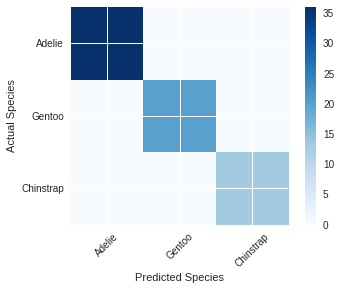

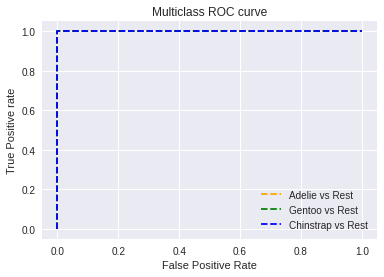

In [60]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix, 
    precision_score, 
    recall_score, 
    roc_auc_score,
    roc_curve
)
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Classification Report :\n',classification_report(y_test,predictions))
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

# Get class probability scores
probs = model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probs[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()